In [ ]:
# The data set that was used absolutely shows that the closer one gets to the latitude of 0 the warmer the max temp. 
# most of the other data sets and plots do not show much change based on latitude only. 
# some of the data sets show a steady change as you move north through the southern hemisphere and into the northern.
    # when you would expect a horseshoe or U shape, like you see in the max temp data, you don't see it in others. 

In [138]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [18]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [21]:
#setting up and testing URL 
url = "http://api.openweathermap.org/data/2.5/weather?"
query = url + "appid=" + weather_api + "&q=" + 'roanoke' + '&units=imperial'
response = requests.get(query).json()
pprint(response)


{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 37.271, 'lon': -79.9414},
 'dt': 1629674557,
 'id': 4782167,
 'main': {'feels_like': 86.92,
          'humidity': 66,
          'pressure': 1013,
          'temp': 82.76,
          'temp_max': 87.67,
          'temp_min': 77.05},
 'name': 'Roanoke',
 'sys': {'country': 'US',
         'id': 2031082,
         'sunrise': 1629628943,
         'sunset': 1629676990,
         'type': 2},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 330, 'speed': 3.44}}


In [22]:
# info for pulling data
# city = response['name']
# lat =response['coord']['lat']
# lng = response['coord']['lon']
# maxtemp = response['main']['temp_max']
# humid = response['main']['humidity']
# cloud = response['clouds']['all']
# windspd = response['wind']['speed']
# country = response['sys']['country']
# date = response['dt']

#empty containers for information
cityname = []
lat = []
lng = []
maxtemp = []
humid = []
cloud = []
windspd = []
country = []
date = []

#Record and Set info
record = 0
set = 1

#pulling data and printing results
for city in cities:
    try:
        response = requests.get(url + "appid=" + weather_api + "&q=" + city + '&units=imperial').json()
        cityname.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windspd.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if record < 50:
            record = record + 1 
        if record == 50:
            record = 1
            set = set + 1
        print(f"Processing Record {record} of Set {set} | {response['name']}" )
        print("-------------------------------------------------------")
    except KeyError:
        print('City Not Found. Skipping...')
        print("-------------------------------------------------------")
        

print('Data Retrieval Complete')


City Not Found. Skipping...
-------------------------------------------------------
Processing Record 1 of Set 1 | George Town
-------------------------------------------------------
Processing Record 2 of Set 1 | Kapaa
-------------------------------------------------------
Processing Record 3 of Set 1 | Punta Arenas
-------------------------------------------------------
City Not Found. Skipping...
-------------------------------------------------------
Processing Record 4 of Set 1 | Ponta do Sol
-------------------------------------------------------
Processing Record 5 of Set 1 | Independence
-------------------------------------------------------
Processing Record 6 of Set 1 | Alice Springs
-------------------------------------------------------
Processing Record 7 of Set 1 | Saint Paul Harbor
-------------------------------------------------------
Processing Record 8 of Set 1 | Katherine
-------------------------------------------------------
Processing Record 9 of Set 1 | Lebu
-

Processing Record 30 of Set 2 | Namatanai
-------------------------------------------------------
Processing Record 31 of Set 2 | Yambio
-------------------------------------------------------
Processing Record 32 of Set 2 | Sunrise Manor
-------------------------------------------------------
Processing Record 33 of Set 2 | Mahébourg
-------------------------------------------------------
Processing Record 34 of Set 2 | Eston
-------------------------------------------------------
Processing Record 35 of Set 2 | Praia da Vitória
-------------------------------------------------------
Processing Record 36 of Set 2 | Necochea
-------------------------------------------------------
Processing Record 37 of Set 2 | Henties Bay
-------------------------------------------------------
Processing Record 38 of Set 2 | Hithadhoo
-------------------------------------------------------
Processing Record 39 of Set 2 | Ilulissat
-------------------------------------------------------
Processing Reco

Processing Record 10 of Set 4 | Hasaki
-------------------------------------------------------
City Not Found. Skipping...
-------------------------------------------------------
City Not Found. Skipping...
-------------------------------------------------------
Processing Record 11 of Set 4 | Nicoya
-------------------------------------------------------
Processing Record 12 of Set 4 | Husavik
-------------------------------------------------------
Processing Record 13 of Set 4 | Padang
-------------------------------------------------------
Processing Record 14 of Set 4 | Cockburn Town
-------------------------------------------------------
Processing Record 15 of Set 4 | Mandera
-------------------------------------------------------
Processing Record 16 of Set 4 | Hokitika
-------------------------------------------------------
Processing Record 17 of Set 4 | Itoman
-------------------------------------------------------
Processing Record 18 of Set 4 | Rawson
----------------------

Processing Record 41 of Set 5 | Whitehorse
-------------------------------------------------------
Processing Record 42 of Set 5 | Dubti
-------------------------------------------------------
Processing Record 43 of Set 5 | Poum
-------------------------------------------------------
Processing Record 44 of Set 5 | Padilla
-------------------------------------------------------
Processing Record 45 of Set 5 | Vikhorevka
-------------------------------------------------------
City Not Found. Skipping...
-------------------------------------------------------
Processing Record 46 of Set 5 | Anloga
-------------------------------------------------------
Processing Record 47 of Set 5 | Palembang
-------------------------------------------------------
Processing Record 48 of Set 5 | Hamilton
-------------------------------------------------------
Processing Record 49 of Set 5 | Pevek
-------------------------------------------------------
Processing Record 1 of Set 6 | Lahaina
------------

Processing Record 22 of Set 7 | Half Moon Bay
-------------------------------------------------------
City Not Found. Skipping...
-------------------------------------------------------
Processing Record 23 of Set 7 | Rørvik
-------------------------------------------------------
Processing Record 24 of Set 7 | Chokurdakh
-------------------------------------------------------
Processing Record 25 of Set 7 | Mbumi
-------------------------------------------------------
Processing Record 26 of Set 7 | Avdeyevka
-------------------------------------------------------
Processing Record 27 of Set 7 | Avera
-------------------------------------------------------
Processing Record 28 of Set 7 | Abu Samrah
-------------------------------------------------------
Processing Record 29 of Set 7 | Puerto Madero
-------------------------------------------------------
Processing Record 30 of Set 7 | Katobu
-------------------------------------------------------
Processing Record 31 of Set 7 | Saldan

Processing Record 5 of Set 9 | Mossamedes
-------------------------------------------------------
Processing Record 6 of Set 9 | Arrondissement de Verdun
-------------------------------------------------------
Processing Record 7 of Set 9 | Viseu
-------------------------------------------------------
City Not Found. Skipping...
-------------------------------------------------------
Processing Record 8 of Set 9 | Najrān
-------------------------------------------------------
Processing Record 9 of Set 9 | San Rafael
-------------------------------------------------------
Processing Record 10 of Set 9 | Coyhaique
-------------------------------------------------------
Processing Record 11 of Set 9 | Vestmanna
-------------------------------------------------------
Processing Record 12 of Set 9 | Wajir
-------------------------------------------------------
Processing Record 13 of Set 9 | Bartica
-------------------------------------------------------
Processing Record 14 of Set 9 | Amb

Processing Record 36 of Set 10 | Aljezur
-------------------------------------------------------
City Not Found. Skipping...
-------------------------------------------------------
Processing Record 37 of Set 10 | Qaqortoq
-------------------------------------------------------
Processing Record 38 of Set 10 | Ząbkowice Śląskie
-------------------------------------------------------
Processing Record 39 of Set 10 | Xingcheng
-------------------------------------------------------
Processing Record 40 of Set 10 | Sorong
-------------------------------------------------------
Processing Record 41 of Set 10 | Ashland
-------------------------------------------------------
Processing Record 42 of Set 10 | Tocopilla
-------------------------------------------------------
Processing Record 43 of Set 10 | Along
-------------------------------------------------------
Processing Record 44 of Set 10 | Emirdağ
-------------------------------------------------------
Processing Record 45 of Set 10 

Processing Record 15 of Set 12 | Gómez Palacio
-------------------------------------------------------
Processing Record 16 of Set 12 | Balsas
-------------------------------------------------------
Processing Record 17 of Set 12 | Palora
-------------------------------------------------------
Processing Record 18 of Set 12 | Belfast
-------------------------------------------------------
Processing Record 19 of Set 12 | Şile
-------------------------------------------------------
City Not Found. Skipping...
-------------------------------------------------------
Processing Record 20 of Set 12 | Sarangani
-------------------------------------------------------
Processing Record 21 of Set 12 | Inhambane
-------------------------------------------------------
Processing Record 22 of Set 12 | Pemangkat
-------------------------------------------------------
Processing Record 23 of Set 12 | Geraldton
-------------------------------------------------------
City Not Found. Skipping...
------

In [23]:
#creating dataframe
weatherdf = pd.DataFrame({
    'City': cityname,
    'Lat': lat, 
    'Lng': lng, 
    'Max Temp': maxtemp ,
    'Humidity': humid ,
    'Cloudiness': cloud ,
    'Wind Speed': windspd,
    'Country': country,
    'Date': date,
})

weatherdf.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,George Town,5.4112,100.3354,77.90,86,20,3.44,MY,1629674739
1,Kapaa,22.0752,-159.3190,88.12,64,20,5.01,US,1629674740
2,Punta Arenas,-53.1500,-70.9167,37.51,93,90,13.80,CL,1629674636
3,Ponta do Sol,32.6667,-17.1000,72.72,78,0,3.22,PT,1629674744
4,Independence,39.0911,-94.4155,88.95,68,20,1.99,US,1629674488
5,Alice Springs,-23.7000,133.8833,60.35,48,11,19.57,AU,1629674747
6,Saint Paul Harbor,57.7900,-152.4072,56.71,94,90,8.05,US,1629674748
7,Katherine,-14.4667,132.2667,77.32,53,0,5.75,AU,1629674750
8,Lebu,-37.6167,-73.6500,46.58,74,63,3.96,CL,1629674751
9,Port Lincoln,-34.7333,135.8667,52.97,60,61,21.65,AU,1629674754


In [24]:
#saving dataframe as csv
weatherdf.to_csv('Weather Data.csv')

In [25]:
#showing analytical data
weatherdf.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02
mean,20.813389,17.136222,68.908137,72.950427,52.606838,7.165333,1.629675e+09
std,32.479502,91.613837,13.900918,20.660645,39.088361,5.240409,1.243686e+02
min,-54.800000,-175.200000,34.570000,4.000000,0.000000,0.000000,1.629674e+09
25%,-3.483300,-66.895800,58.440000,62.000000,8.000000,3.440000,1.629675e+09
50%,22.890900,20.282700,71.130000,78.000000,60.000000,5.750000,1.629675e+09
75%,48.139900,101.163600,79.290000,88.000000,90.000000,9.510000,1.629675e+09
max,78.218600,179.316700,108.120000,100.000000,100.000000,36.010000,1.629675e+09


In [26]:
#checking to see if humidity has value greater than 100 
maxv = weatherdf['Humidity'].max()

maxv

100

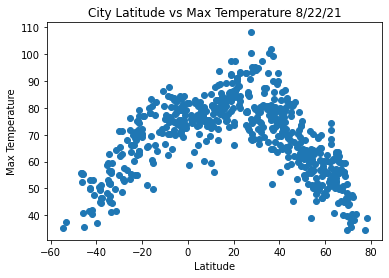

In [118]:
#creating latitude vs max temp plot 

plt.xlabel("Latitude")
plt.ylabel('Max Temperature')
plt.title('City Latitude vs Max Temperature 8/22/21')
plt.scatter(lat,maxtemp)
plt.savefig('Visuals/City Latitude vs Max Temperature',facecolor='w')

In [116]:
# The above plot is showing the correlation between city latitude and the max temperature in that city. 
# We can see a fairly consistant arch that happens as the latitude reaches the a lower latitudes the tempature gets higher. 


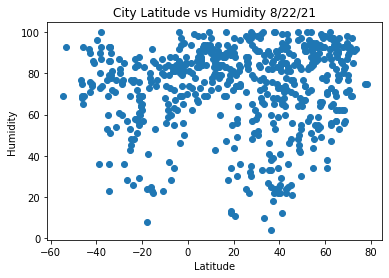

In [119]:
#creating latitude vs humidity plot 

plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity 8/22/21')
plt.scatter(lat,humid)
plt.savefig('Visuals/City Latitude vs Humidity',facecolor='w')

In [ ]:
# This scatter chart is showing the correlation between a city's latitude and the humidty of that city. 
# without getting too deep into the numbers the correlation looks weak as it does not appear to have a corelation at all. 

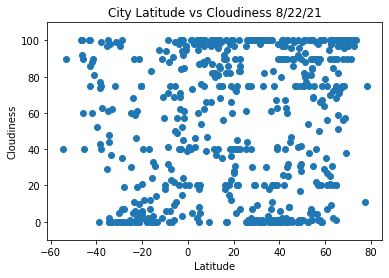

In [120]:
#creating latitude vs cloudiness plot 

plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness 8/22/21')
plt.ylim(-10,110)
plt.scatter(lat,cloud)
plt.savefig('Visuals/City Latitude vs Cloudiness',facecolor='w')

In [ ]:
# This chart is showing the correlation between a city's latitude and cloudiness of that same city. 
# Much like the last chart the correlation seems to be weak between these two factors. 

In [50]:
#separate the dataframe into Northern and Southern Hemispheres. 
north = weatherdf[weatherdf['Lat']>=0]
south = weatherdf[weatherdf['Lat']<0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Punta Arenas,-53.1500,-70.9167,37.51,93,90,13.80,CL,1629674636
5,Alice Springs,-23.7000,133.8833,60.35,48,11,19.57,AU,1629674747
7,Katherine,-14.4667,132.2667,77.32,53,0,5.75,AU,1629674750
8,Lebu,-37.6167,-73.6500,46.58,74,63,3.96,CL,1629674751
9,Port Lincoln,-34.7333,135.8667,52.97,60,61,21.65,AU,1629674754
...,...,...,...,...,...,...,...,...,...
575,Grand Gaube,-20.0064,57.6608,70.20,69,4,1.99,MU,1629675111
578,Broken Hill,-31.9500,141.4333,49.71,71,75,14.97,AU,1629675082
579,Amahai,-3.3333,128.9167,79.12,83,100,1.05,ID,1629675112
581,Constitución,-35.3333,-72.4167,48.13,77,29,9.13,CL,1629675113


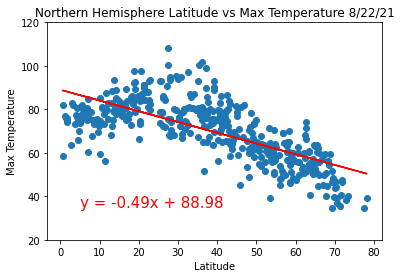

The R-value is  -0.7111759338309018


In [129]:
#Northern max temp vs lat

nlat = north['Lat']
ntemp = north['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, ntemp)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere Latitude vs Max Temperature 8/22/21')
plt.ylim(20,120)
plt.scatter(nlat,ntemp)

plt.plot(nlat,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

plt.savefig('Visuals/Northern Hemisphere Latitude vs Max Temperature',facecolor='w')

plt.show()
print(f"The R-value is  {rvalue}")


In [ ]:
# This plot is showing a negative correlation in Latitude vs Max Temperature.
# Meaning that the further away from latitude 0 you get the lower Max Temperature is recorded. 

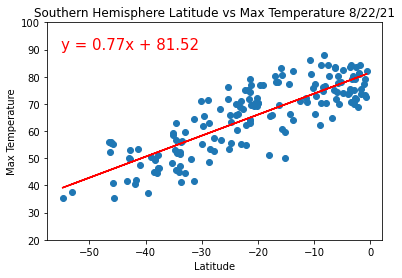

The R-value is  0.8314114048355782


In [130]:
# Southern Hemisphere max temp vs lat
slat = south['Lat']
stemp = south['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, stemp)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere Latitude vs Max Temperature 8/22/21')
plt.ylim(20,100)
plt.scatter(slat,stemp)

plt.plot(slat,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")

plt.savefig('Visuals/Southern Hemisphere Latitude vs Max Temperature',facecolor='w')

plt.show()
print(f"The R-value is  {rvalue}")


In [ ]:
# This plot is showing the same correlation as the previous plot, just from the Southern Hemisphere. 
# the closer to latitude 0 we get the higher the Max Temperature reaches. 
# the correlation in this case is positive because of starting further from zero.  

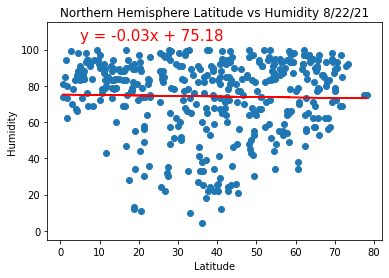

The R-value is  -0.025667958250373036


In [131]:
#Northern Hemisphere Humidity vs Latitude 

nlat = north['Lat']
nhumid = north['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nhumid)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.title('Northern Hemisphere Latitude vs Humidity 8/22/21')
plt.ylim(-5,115)
plt.scatter(nlat,nhumid)

plt.plot(nlat,regress_values,"r-")
plt.annotate(line_eq,(5,105),fontsize=15,color="red")

plt.savefig('Visuals/Northern Hemisphere Latitude vs Humidity',facecolor='w')

plt.show()
print(f"The R-value is  {rvalue}")


In [ ]:
#This plot is showing the correlation between Latitude and Humidity in the Northern Hemisphere. 
# There is not a strong negative correlation, but the data seems to show that as you move away from 
# latitude 0 there is a slight drop in humidity 

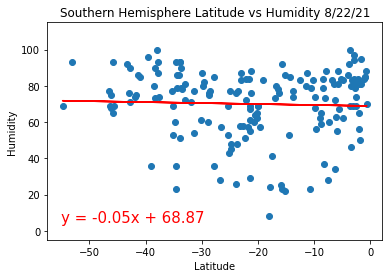

The R-value is  -0.03914840649747998


In [132]:
#Southern Hemisphere Humidity vs Latitude 

slat = south['Lat']
shumid = south['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, shumid)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.title('Southern Hemisphere Latitude vs Humidity 8/22/21')
plt.ylim(-5,115)
plt.scatter(slat,shumid)

plt.plot(slat,regress_values,"r-")
plt.annotate(line_eq,(-55,5),fontsize=15,color="red")

plt.savefig('Visuals/Southern Hemisphere Latitude vs Humidity',facecolor='w')

plt.show()
print(f"The R-value is  {rvalue}")


In [137]:
# This plot is interesting when compared with the previous plot. 
# As it shows latitude vs humidity in the southern hemisphere. 
# this plot shows a slight negative corelation also. Meaning that as you move closer to latitude 0 
# the less humidity is being recorded. This seems to indicate that there is more humidity in the 
# Southern hemisphere altogether and the further north into the northern hemisphere you travel the 
# less humidity will be expereinced, althought the overall change is not that significant. 

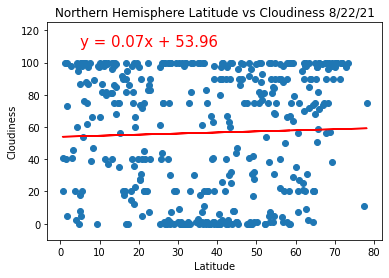

The R-value is  0.03469862372390016


In [133]:
#Northern Hemisphere cloudiness vs Latitude 

nlat = north['Lat']
ncloud = north['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, ncloud)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Latitude vs Cloudiness 8/22/21')
plt.ylim(-10,125)
plt.scatter(nlat,ncloud)

plt.plot(nlat,regress_values,"r-")
plt.annotate(line_eq,(5,110),fontsize=15,color="red")

plt.savefig('Visuals/Northern Hemisphere Latitude vs Cloudiness',facecolor='w')

plt.show()
print(f"The R-value is  {rvalue}")


In [ ]:
# this plot is showing the correlation between latitude and cloudiness. 
# this is not a strong correlation shown here as there are dense amounts 
# data points along the 0% cloudiness and the 100% cloudiness. With all 
# of that being said there is still a slight correlation between the higher 
# latitude and the higher percentange of cloud cover. 

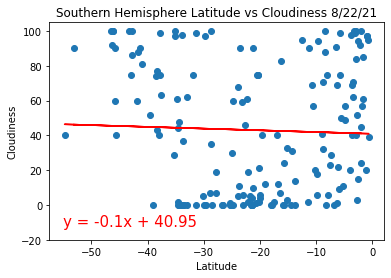

The R-value is  -0.03690283666610181


In [134]:
#Southern Hemisphere cloudiness vs Latitude 

slat = south['Lat']
scloud = south['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, scloud)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude vs Cloudiness 8/22/21')
plt.ylim(-20,105)
plt.scatter(slat,scloud)

plt.plot(slat,regress_values,"r-")
plt.annotate(line_eq,(-55,-12),fontsize=15,color="red")

plt.savefig('Visuals/Southern Hemisphere Latitude vs Cloudiness',facecolor='w')

plt.show()
print(f"The R-value is  {rvalue}")


In [ ]:
# This plot shows the correlation between latitude and cloudiness is 
# confirming the data from the previous plot in that it is showing a 
# very slight negative correlation. This all together is showing that there 
# is a very slight drop in cloud cover as one moves to the latitude of 0. 

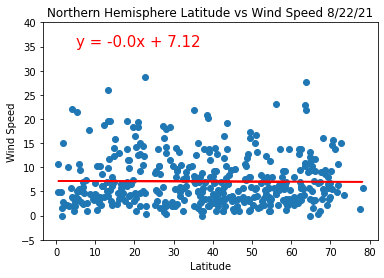

The R-value is  -0.0051967709108967615


In [135]:
#Northern Hemisphere wind speed vs Latitude 

nlat = north['Lat']
nwind = north['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nwind)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Latitude vs Wind Speed 8/22/21')
plt.ylim(-5,40)
plt.scatter(nlat,nwind)

plt.plot(nlat,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

plt.savefig('Visuals/Northern Hemisphere Latitude vs Wind Speed',facecolor='w')

plt.show()
print(f"The R-value is  {rvalue}")


In [ ]:
# this plot showing the correlation verses wind speed and latitude in the northern hemisphere is probably 
# the smallest correlation that we have seen. The correlation is really almost non existent and is not 
# of any significance with the r-value being -0.005. 

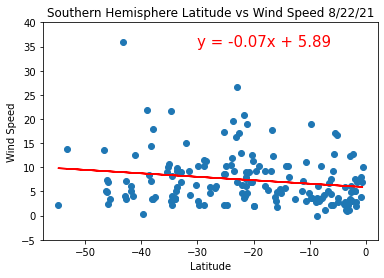

The R-value is  -0.1840049866106934


In [136]:
#Southern Hemisphere wind speed vs Latitude 

slat = south['Lat']
swind = south['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, swind)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Latitude vs Wind Speed 8/22/21')
plt.ylim(-5,40)
plt.scatter(slat,swind)

plt.plot(slat,regress_values,"r-")
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")

plt.savefig('Visuals/Southern Hemisphere Latitude vs Wind Speed',facecolor='w')

plt.show()
print(f"The R-value is  {rvalue}")


In [ ]:
#this plot of the southern hemisphere's correlation of latitude vs wind speed is fairly 
# significant in light of the previous plot's data. After looking at the plot a little longer 
# there may be a possible outlier at above 35 mph that may have skewed this dataset just a bit. 
# even with the possibility of the outlier the r-value is just not strong enough to call this 
# overly strong. Especially with the information from the plot of the northern hemisphere. 